<a href="https://colab.research.google.com/github/CandelaMenaBisignano07/breast_cancer_detection_model/blob/main/breast_cancer_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# DEVICE AGNOSTIC CODE
device = "cuda" if torch.cuda.is_available() else "cpu"

tensor(0.)

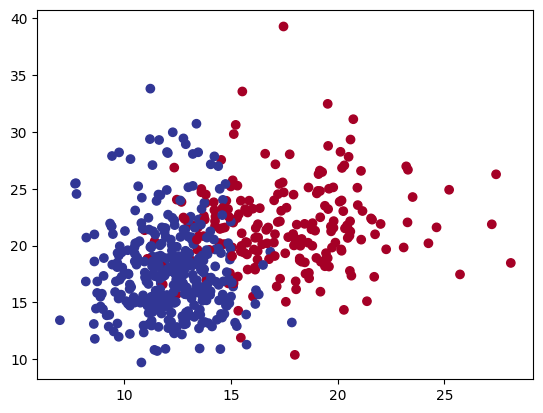

In [93]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch

# SETTING AND VISUALIZING DATA
data = load_breast_cancer()

X_data, y_data = data.data.copy(), data.target
X_data, y_data = torch.from_numpy(X_data).type(torch.float),torch.from_numpy(y_data).type(torch.float)
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, shuffle=True)

plt.scatter(X_data[:, 0], X_data[:,1], c=y_data, cmap=plt.cm.RdYlBu)

y_data[0]

In [113]:
# CREATING MODEL

import torch
class BreastCancerModel(torch.nn.Module):
  def __init__(self, in_features, out_features, hidden_units=16):
    super().__init__()
    self.seq = torch.nn.Sequential(
        torch.nn.Linear(in_features=in_features, out_features=hidden_units),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=hidden_units, out_features=hidden_units),
        torch.nn.ReLU(),
        torch.nn.Linear(in_features=hidden_units, out_features=out_features)
    )
  def forward(self, x:torch.tensor):
    return self.seq(x)


model_0 = BreastCancerModel(in_features=X_data.size(dim=1), out_features=1).to(device)

In [114]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.001)

In [123]:
# TRAINING LOOP

torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_data_train, y_data_train = X_data_train.to(device), y_data_train.to(device)
X_data_test, y_data_test = X_data_test.to(device), y_data_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_0.train()
  y_logits_train = model_0(X_data_train).squeeze()
  y_probs_train = torch.sigmoid(y_logits_train)
  y_preds_train = torch.round(y_probs_train)

  loss = loss_fn(y_logits_train, y_data_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch %100 == 0:
    print(f'loss: {loss}')



loss: 0.1856372058391571
loss: 0.1924278736114502
loss: 0.17550554871559143
loss: 0.19422239065170288
loss: 0.178568035364151
loss: 0.17344240844249725
loss: 0.1749880015850067
loss: 0.1742415875196457
loss: 0.18212464451789856
loss: 0.18687383830547333


In [124]:
# MAKING PREDICTIONS
with torch.inference_mode():
    y_pred = model_0(X_data_test)
    y_pred_labels = torch.round(torch.sigmoid(y_pred)).squeeze()

In [125]:
torch.eq(y_pred_labels[:10], y_data_test[:10])

tensor([False,  True,  True,  True,  True,  True,  True,  True,  True,  True])

In [126]:
from pathlib import Path


# SAVING TRAINED MODEL PARAMETERS

MODEL_PATH = Path("model_params")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'breast_cancer_model_params.pt'
MODEL_SAVE_PATH =  MODEL_PATH / MODEL_NAME
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [134]:
"""
Code for loading trained model parameters into a new instance and testing it.

model_1 = BreastCancerModel(X_data.size(dim=1), 1).to(device)
model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_data_test).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

torch.eq(y_preds, y_data_test)
"""""

'\nCode for loading trained model parameters into a new instance and testing it.\n\nmodel_1 = BreastCancerModel(X_data.size(dim=1), 1).to(device)\nmodel_1.load_state_dict(torch.load(MODEL_SAVE_PATH))\n\nmodel_1.eval()\nwith torch.inference_mode():\n  y_logits = model_1(X_data_test).squeeze()\n  y_preds = torch.round(torch.sigmoid(y_logits))\n\ntorch.eq(y_preds, y_data_test)\n'